# 2.3 Linear Discriminant Analysis 

In the following, we will work on the Iris data Set. As a little helper for you, we will use an out-of-the-box method from the seaborn package to visualize the data set. The seaborn package is a matplotlib-based visualization package. You can install it by typing the following command in the terminal: "__sudo pip3 install seaborn__". If you run the script and you do not see the data, also install the cairo backend with "__sudo pip3 install cairocffi__".

__Task:__ Which of the four features is the most discriminant one? 

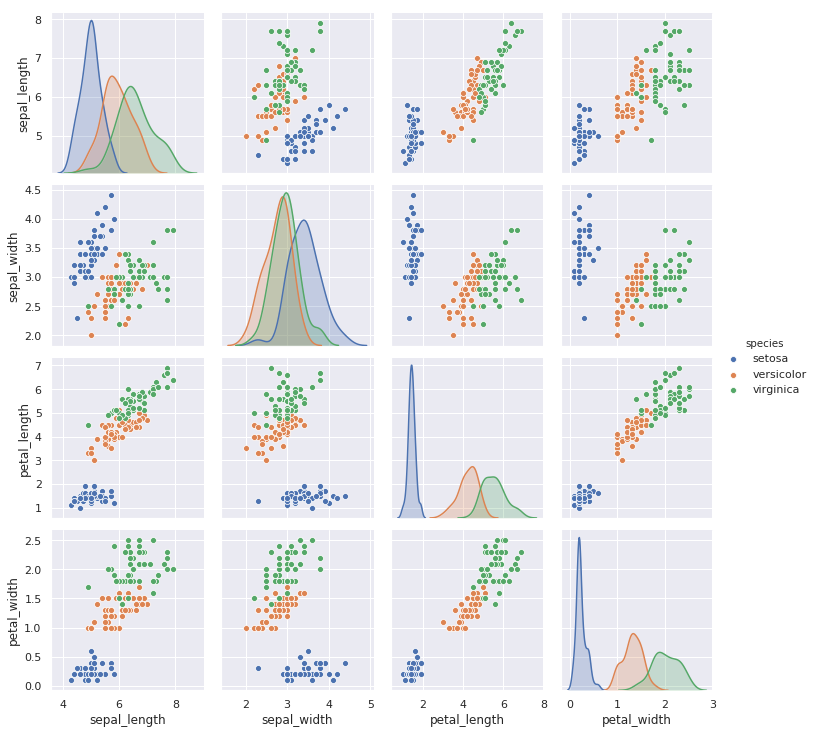

In [2]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
df = sns.load_dataset("iris")
sns.pairplot(df, hue="species")
plt.show()

## Implementation of a 2-class LDA
 
__Task__: Write a function *train_LDA()* that uses training data $\mathbf{X}$ and labels $\mathbf y$ to train an LDA model and returns weights $\mathbf w$ and a bias $\mathbf b$ for a two-class problem. Review the lecture slides for the theoretical backgrounds.

In [8]:
classes = np.unique(y_train)
classes

array([1, 2])

In [20]:
X_c1 = X_train[y_train==1, :]
X_c2 = X_train[y_train==2, :]

In [17]:
X_c1.shape

(39, 4)

In [18]:
mean = np.mean(X_c1, 0)
part1 = (X_c1 - mean).T
part2 = (X_c1 - mean)
Cov_c1 = 1./(len(X_c1) - 1) * np.dot(part1, part2)
Cov_c1

array([[0.27564103, 0.08945344, 0.19416329, 0.06174089],
       [0.08945344, 0.10271255, 0.08352227, 0.03882591],
       [0.19416329, 0.08352227, 0.24365722, 0.08129555],
       [0.06174089, 0.03882591, 0.08129555, 0.03781377]])

In [21]:
mean = np.mean(X_c2, 0)
part1 = (X_c2 - mean).T
part2 = (X_c2 - mean)
Cov_c2 = 1./(len(X_c2) - 1) * np.dot(part1, part2)
Cov_c2

array([[0.38313846, 0.05046154, 0.29436923, 0.05369231],
       [0.05046154, 0.09033846, 0.02683077, 0.02750769],
       [0.29436923, 0.02683077, 0.31398462, 0.04424615],
       [0.05369231, 0.02750769, 0.04424615, 0.05846154]])

In [22]:
# create pseudo inverse

np.linalg.pinv(Cov_c2 + Cov_c1)

array([[ 4.5571386 , -1.24665959, -3.83466187,  0.39532786],
       [-1.24665959,  7.19492237,  0.63397973, -4.28926318],
       [-3.83466187,  0.63397973,  5.79033337, -3.38960418],
       [ 0.39532786, -4.28926318, -3.38960418, 17.28818225]])

In [34]:
import numpy as np
import matplotlib.pyplot as plt

def train_lda(X, y):
    ''' Train an LDA
    Input: X data matrix with shape NxD
           y label vector with shape Nx1
    Output: weight vector with shape Nx1 
            bias term - real-valued '''
    means = []
    conv= []
    classes = np.unique(y)
    for c in classes:
        X_g = X[y == c, :]
        mean = np.mean(X_g, 0)
        part1 = (X_g - mean).T
        part2 = (X_g - mean)
        Cov_g = 1. / (len(X_g) - 1) * np.dot(part1, part2)
        means.append(mean)
        conv.append(Cov_g)
    
    # there are only 2 classes
    # weights is the inverse of S_w multipied bei(mean_2 - mean1)
    s_w= 0.5 * (conv[0] + conv[1])
    weights = np.dot(np.linalg.pinv(s_w), (means[1] - means[0]))
    mean = means[0] + means[1]
    
    bias = -0.5 * np.dot(weights, mean)
    
    return weights, bias


## Validation of the trained LDA model 

__Task__: Write a function *apply_lda()* that uses the weights and bias of the *train_LDA(X, y)* function and returns a vector of predicted classes.

In [46]:
def apply_lda(X_test, weights, bias):
    '''Predict the class label per sample 
    Input: X_test - data matrix with shape NxD
           weight vector and bias term from train_LDA
    Output: vector with entries 1 or 2 depending on the class'''    
    
    y_dist = np.dot(X_test, weights.T) + bias
    # y_dist only positive or negative number 
    # convert them to the negative number to lable 1 and positive 2 
    y_test = 1 + (np.sign(y_dist) +1 ) / 2
    
    return y_test

## Test your implementations with the Iris data set

In Assignment 1, you have already been inspecting the iris data set. Now, train an LDA on the training data of the iris data set (using only class 1 and 2) and validate it on your training and test data.

#### Q2.3.1 Which accuracy can you achieve on the iris data test set?

In [47]:
# Load the iris data set 
X_train_all = np.loadtxt('data/iris_train.data', delimiter=' ', dtype=float)
y_train_all = np.loadtxt('data/iris_train.labels', dtype=int)
X_test_all = np.loadtxt('data/iris_test.data', delimiter=' ', dtype=float)
y_test_all = np.loadtxt('data/iris_test.labels', dtype=int)

# only select classes 1 and 2
X_train = X_train_all[np.logical_or(y_train_all==1,y_train_all==2)]
y_train = y_train_all[np.logical_or(y_train_all==1,y_train_all==2)]

X_test = X_test_all[np.logical_or(y_test_all==1,y_test_all==2)]
y_test = y_test_all[np.logical_or(y_test_all==1,y_test_all==2)]


# train an LDA and apply it on the test data set, report your accuracy (in percent)
weights, bias = train_lda(X_train, y_train)
print("weights", weights.shape)

y_prediction = apply_lda(X_test, weights, bias)
print(y_prediction)
print('The Accuracy on the test set is %.2f%%' %(sum(y_test==y_prediction)/len(y_test)*100))

weights (4,)
[2. 2. 1. 1. 2. 2. 1. 2. 2. 1. 2. 1. 2. 1. 2. 1. 2. 1. 1. 2. 2. 2. 2. 2.
 2. 2. 2. 1. 2. 2. 2. 1. 2. 1. 2.]
The Accuracy on the test set is 97.14%
